<a href="https://colab.research.google.com/github/missjaanii/basictradingusingpy/blob/master/basicstocktradingusingpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline
 
end = datetime.now()
start = datetime(end.year-3, end.month, end.day)

In [0]:
FCT = web.DataReader("J69U.SI", 'yahoo', start, end)
CMT = web.DataReader("C38U.SI", 'yahoo', start, end)
SGX = web.DataReader("S68.SI", 'yahoo', start, end)
SLA = web.DataReader("5CP.SI", 'yahoo', start, end)
MIT = web.DataReader("ME8U.SI", 'yahoo', start, end)
SING = web.DataReader("Z74.SI", 'yahoo', start, end)
 
# create new dataframe with just closing price for each stock
df = pd.DataFrame({'FCT': FCT['Adj Close'], 'CMT': CMT['Adj Close'],
                   'SGX': SGX['Adj Close'], 'SLA': SLA['Adj Close'],
                   'MIT': MIT['Adj Close'], 'SING': SING['Adj Close']})
df.head(2)

,FCT,CMT,SGX,SLA,MIT,SING
Date,,,,,,
2017-06-06,1.792129,1.688550,6.456478,0.490718,1.561617,3.205507
2017-06-07,1.809363,1.671276,6.474190,0.503862,1.553176,3.180066


Text(0, 0.5, 'Price')

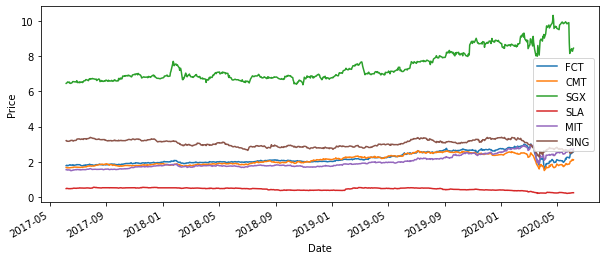

In [0]:
df.plot(figsize=(10,4))
plt.ylabel('Price')

Text(0, 0.5, 'Return From Start Price')

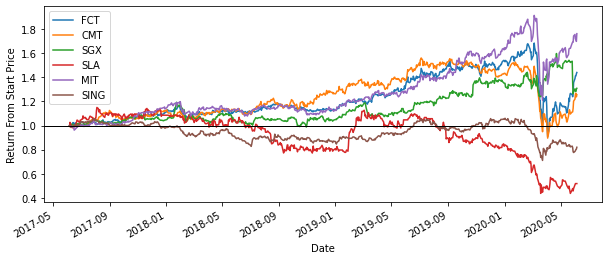

In [0]:
returnfstart = df.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(10,4)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

Text(0, 0.5, 'Return From Start Price')

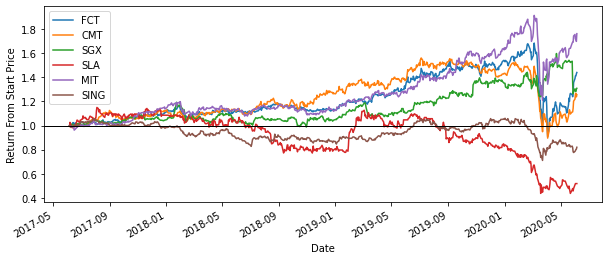

In [0]:
returnfstart = df.apply(lambda x: x / x[0])


returnfstart.plot(figsize=(10,4)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

Text(0, 0.5, 'Daily Percentage Return')

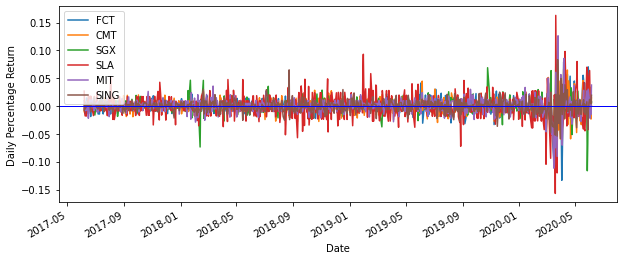

In [0]:
df2=df.pct_change()
 
df2.plot(figsize=(10,4))
plt.axhline(0, color='blue', lw=1)
plt.ylabel('Daily Percentage Return')

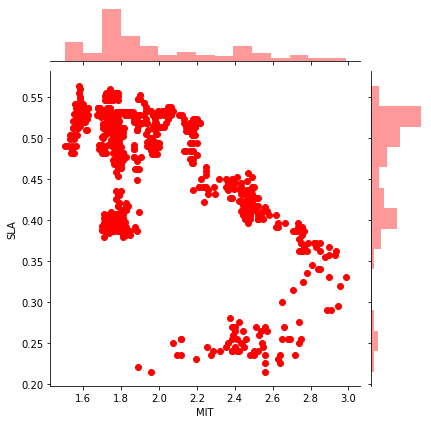

In [0]:
sns.jointplot('MIT', 'SLA', df, kind='scatter', color='red')

In [0]:
#from seaborn.linearmodels import corrplot,symma

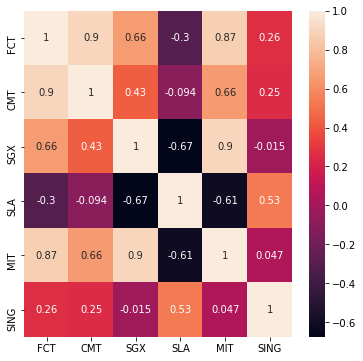

In [0]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

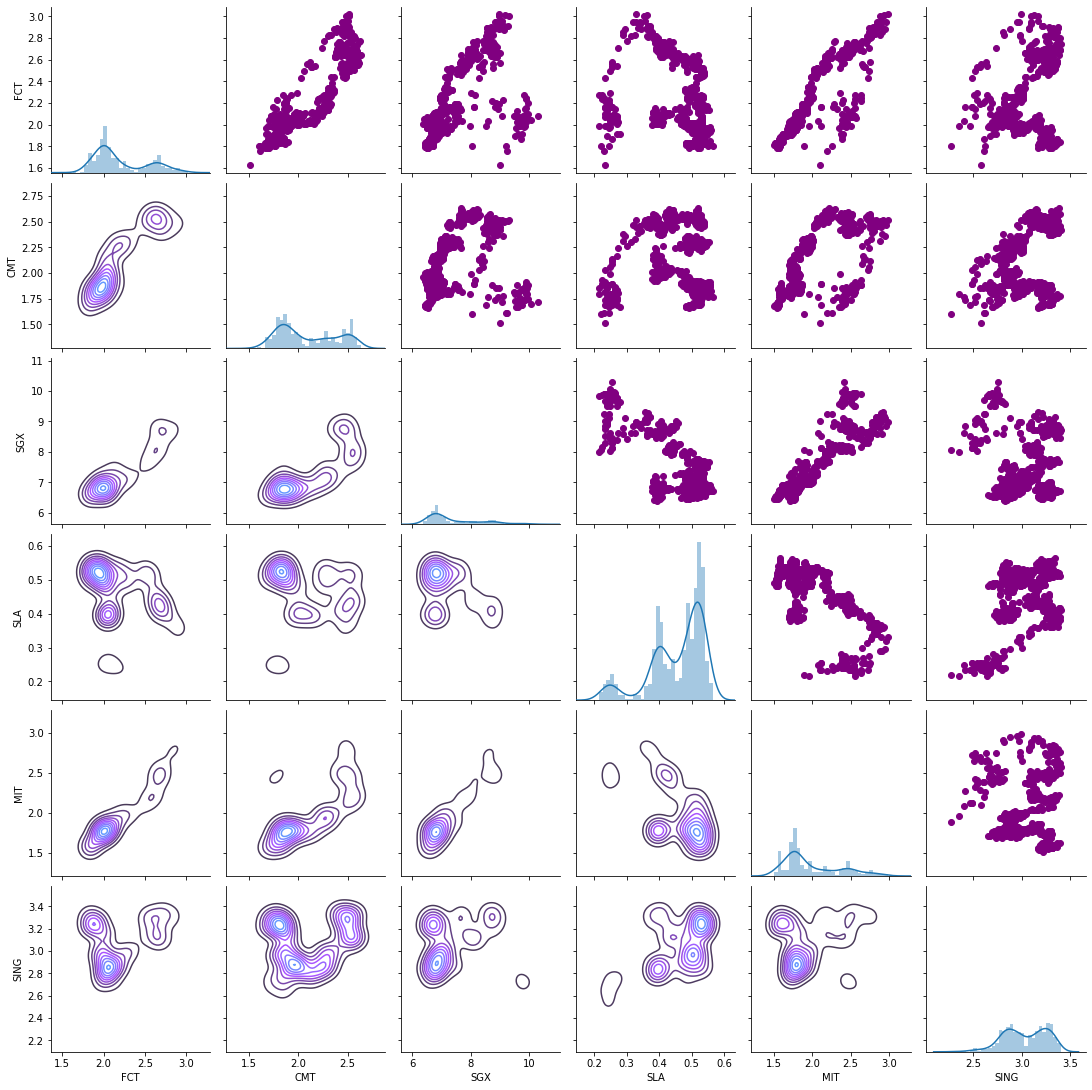

In [0]:
fig = sns.PairGrid(df.dropna())
 
# define top, bottom and diagonal plots
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30)

In [0]:
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)
 
CMT = web.DataReader("C38U.SI", 'yahoo', start, end)
CMT.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-06,2.11,2.09,2.10,2.11,8123000.0,1.924676
2018-06-07,2.11,2.10,2.11,2.11,5150100.0,1.924676


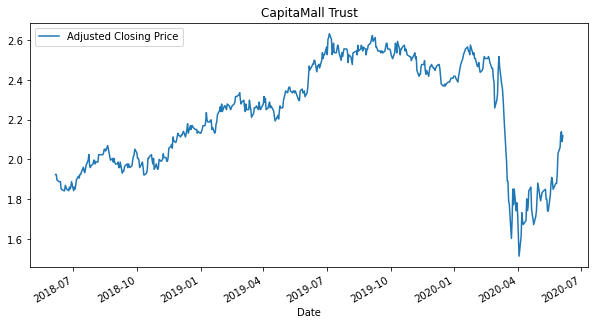

In [0]:
CMT['Adj Close'].plot(legend=True, figsize=(10, 5), \
title='CapitaMall Trust', \
label='Adjusted Closing Price')

Text(0, 0.5, 'Volume')

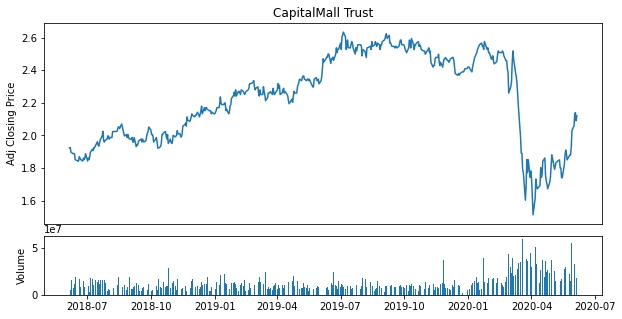

In [0]:
plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(CMT.index, CMT['Adj Close']) #CMT.index gives the dates
bottom.bar(CMT.index, CMT['Volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('CapitalMall Trust')
top.set_ylabel('Adj Closing Price')
bottom.set_ylabel('Volume')

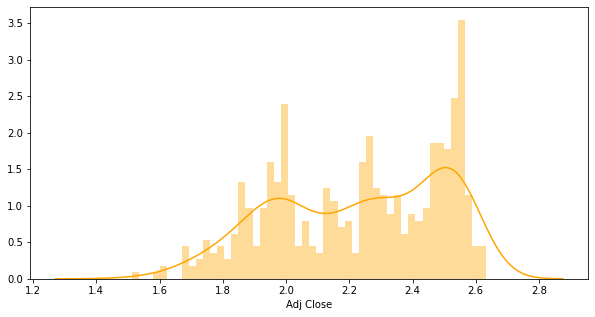

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(CMT['Adj Close'].dropna(), bins=50, color='orange')

Text(2015-11-24, 2.25, 'SMA 10-50')

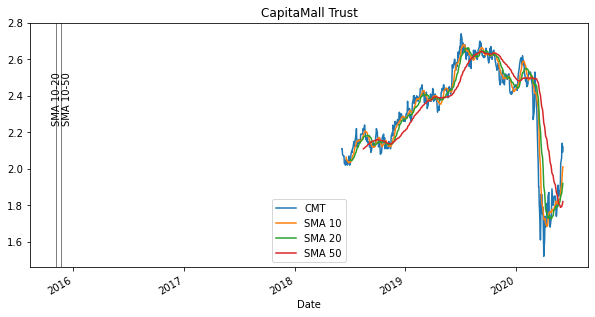

In [0]:
# simple moving averages
sma10 = CMT['Close'].rolling(10).mean() #10 days
sma20 = CMT['Close'].rolling(20).mean() #20 days
sma50 = CMT['Close'].rolling(50).mean() #50 days
 
CMTsma = pd.DataFrame({'CMT': CMT['Close'], 'SMA 10': sma10, 'SMA 20': sma20, 'SMA 50': sma50})
CMTsma.plot(figsize=(10, 5), legend=True, title='CapitaMall Trust')
 
# add vertical lines with annotations
plt.axvline(x = '2015-11-3', color = "black", lw=0.5)
plt.text('2015-10-23', 2.25, 'SMA 10-20',rotation=90)
plt.axvline(x = '2015-11-20', color = "black", lw=0.5)
plt.text('2015-11-24', 2.25, 'SMA 10-50',rotation=90)